In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy import stats

In [2]:
tmdb_df = pd.read_csv('Data/tmdb_combined.csv.gz', lineterminator='\n')
tmdb_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0103340,0.0,/rhdDnrUmGamF2kk9HZUgTApms2a.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,268253.0,pl,Życie za życie. Maksymilian Kolbe,...,0.0,90.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,NaN,Life for Life: Maximilian Kolbe,0.0,6.143,14.0,NaN
1,tt0144280,0.0,NaN,NaN,100000.0,[],NaN,30356.0,en,Whispers from a Shallow Grave,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Whispers from a Shallow Grave,0.0,2.000,2.0,NaN
2,tt0197633,0.0,/1hGrzTajJ5JC6VfPzrUj8Gj5t5k.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,58520.0,en,Live Freaky! Die Freaky!,...,0.0,75.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Live Freaky! Die Freaky!,0.0,3.800,8.0,NR
3,tt0204250,0.0,/qKiOZMJH9Riqlk2SkUOgSMZHHJu.jpg,NaN,0.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...",NaN,459563.0,en,Death of a Saleswoman,...,0.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6 housewives. 1 dead body. A trunk full of pla...,Death of a Saleswoman,0.0,3.000,1.0,NaN
4,tt0206634,0.0,/z8FzomPxfCb2nv827VWLSI6oYiB.jpg,NaN,76000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://www.universalstudiosentertainment.com/c...,9693.0,en,Children of Men,...,70595464.0,109.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The future's a thing of the past.,Children of Men,0.0,7.605,6256.0,R


## Data Cleaning

In [3]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
tmdb_df = tmdb_df.drop(columns=drop_cols)
tmdb_df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0103340,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",2.348,"[{'id': 73037, 'logo_path': None, 'name': 'Stu...",1991-04-01,0.0,90.0,Life for Life: Maximilian Kolbe,6.143,14.0,NaN
1,tt0144280,0.0,NaN,100000.0,[],2.161,[],1997-01-01,0.0,90.0,Whispers from a Shallow Grave,2.000,2.0,NaN
2,tt0197633,0.0,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1.826,[],2006-01-31,0.0,75.0,Live Freaky! Die Freaky!,3.800,8.0,NR
3,tt0204250,0.0,NaN,0.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...",1.130,"[{'id': 90905, 'logo_path': None, 'name': 'Gir...",2006-09-18,0.0,77.0,Death of a Saleswoman,3.000,1.0,NaN
4,tt0206634,0.0,NaN,76000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",36.219,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",2006-09-22,70595464.0,109.0,Children of Men,7.605,6256.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19318,tt5896628,0.0,NaN,0.0,"[{'id': 80, 'name': 'Crime'}]",0.600,[],2003-05-21,0.0,95.0,Harlem's Beauty,0.000,0.0,NaN
19319,tt6066786,0.0,NaN,0.0,"[{'id': 16, 'name': 'Animation'}]",1.400,"[{'id': 113519, 'logo_path': '/wxcVGtJwKkElcCX...",2004-10-05,0.0,50.0,Tom and Jerry: Paws for a Holiday,4.900,4.0,G
19320,tt6188222,0.0,NaN,0.0,[],2.220,[],2003-12-23,0.0,110.0,Crazy Scum: Adult Movies,4.100,50.0,NaN
19321,tt7246872,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.841,[],2003-09-10,0.0,98.0,"Tokyo, Non-Stop",0.000,0.0,NaN


In [4]:
tmdb_df['belongs_to_collection'].notna().sum()

1458

In [5]:
## Use .notna() to get True if it belongs to a collection
tmdb_df['belongs_to_collection'] = tmdb_df['belongs_to_collection'].notna()
tmdb_df['belongs_to_collection'].value_counts()

False    17865
True      1458
Name: belongs_to_collection, dtype: int64

In [6]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [7]:
## Use ourn function and exploding the new column
tmdb_df['genres_list'] = tmdb_df['genres'].apply(get_genre_name)
tmdb_df_explode = tmdb_df.explode('genres_list')
tmdb_df_explode

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0103340,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",2.348,"[{'id': 73037, 'logo_path': None, 'name': 'Stu...",1991-04-01,0.0,90.0,Life for Life: Maximilian Kolbe,6.143,14.0,NaN,Drama
1,tt0144280,0.0,False,100000.0,[],2.161,[],1997-01-01,0.0,90.0,Whispers from a Shallow Grave,2.000,2.0,NaN,NaN
2,tt0197633,0.0,False,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1.826,[],2006-01-31,0.0,75.0,Live Freaky! Die Freaky!,3.800,8.0,NR,Animation
2,tt0197633,0.0,False,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1.826,[],2006-01-31,0.0,75.0,Live Freaky! Die Freaky!,3.800,8.0,NR,Comedy
2,tt0197633,0.0,False,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1.826,[],2006-01-31,0.0,75.0,Live Freaky! Die Freaky!,3.800,8.0,NR,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19321,tt7246872,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.841,[],2003-09-10,0.0,98.0,"Tokyo, Non-Stop",0.000,0.0,NaN,Comedy
19321,tt7246872,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.841,[],2003-09-10,0.0,98.0,"Tokyo, Non-Stop",0.000,0.0,NaN,Family
19321,tt7246872,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.841,[],2003-09-10,0.0,98.0,"Tokyo, Non-Stop",0.000,0.0,NaN,Drama
19322,tt9641790,0.0,False,400.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",0.600,"[{'id': 174685, 'logo_path': None, 'name': 'Li...",2003-06-10,0.0,60.0,Clearwater,0.000,0.0,NaN,Horror


In [8]:
## save unique genres
unique_genres = tmdb_df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    tmdb_df[f"Genre_{genre}"] = tmdb_df['genres'].str.contains(genre,regex=False)    

## Drop original genre cols
tmdb_df = tmdb_df.drop(columns=['genres','genres_list'])
tmdb_df

,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,release_date,revenue,runtime,title,...,Genre_Crime,Genre_Romance,Genre_Adventure,Genre_Family,Genre_Fantasy,Genre_History,Genre_Documentary,Genre_War,Genre_Western,Genre_TV Movie
0,tt0103340,0.0,False,0.0,2.348,"[{'id': 73037, 'logo_path': None, 'name': 'Stu...",1991-04-01,0.0,90.0,Life for Life: Maximilian Kolbe,...,False,False,False,False,False,False,False,False,False,False
1,tt0144280,0.0,False,100000.0,2.161,[],1997-01-01,0.0,90.0,Whispers from a Shallow Grave,...,False,False,False,False,False,False,False,False,False,False
2,tt0197633,0.0,False,0.0,1.826,[],2006-01-31,0.0,75.0,Live Freaky! Die Freaky!,...,False,False,False,False,False,False,False,False,False,False
3,tt0204250,0.0,False,0.0,1.130,"[{'id': 90905, 'logo_path': None, 'name': 'Gir...",2006-09-18,0.0,77.0,Death of a Saleswoman,...,False,False,False,False,False,False,False,False,False,False
4,tt0206634,0.0,False,76000000.0,36.219,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",2006-09-22,70595464.0,109.0,Children of Men,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19318,tt5896628,0.0,False,0.0,0.600,[],2003-05-21,0.0,95.0,Harlem's Beauty,...,True,False,False,False,False,False,False,False,False,False
19319,tt6066786,0.0,False,0.0,1.400,"[{'id': 113519, 'logo_path': '/wxcVGtJwKkElcCX...",2004-10-05,0.0,50.0,Tom and Jerry: Paws for a Holiday,...,False,False,False,False,False,False,False,False,False,False
19320,tt6188222,0.0,False,0.0,2.220,[],2003-12-23,0.0,110.0,Crazy Scum: Adult Movies,...,False,False,False,False,False,False,False,False,False,False
19321,tt7246872,0.0,False,0.0,0.841,[],2003-09-10,0.0,98.0,"Tokyo, Non-Stop",...,False,False,False,True,False,False,False,False,False,False


In [9]:
## Checking Certification values
# df['certification'].value_counts(dropna=False)

# fix extra space certs
tmdb_df['certification'] = tmdb_df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
tmdb_df['certification'] = tmdb_df['certification'].replace(repl_cert)
tmdb_df['certification'].value_counts(dropna=False)

NaN      13322
R         2886
PG-13     1417
NR         878
PG         601
G          161
NC-17       58
Name: certification, dtype: int64

In [10]:
## split release date into 3 columns
new_cols = ['year','month','day']
tmdb_df[new_cols] = tmdb_df['release_date'].str.split('-',expand=True)
tmdb_df[new_cols] = tmdb_df[new_cols].astype(float)
## drop original feature
tmdb_df = tmdb_df.drop(columns=['release_date'])
tmdb_df

,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,revenue,runtime,title,vote_average,...,Genre_Family,Genre_Fantasy,Genre_History,Genre_Documentary,Genre_War,Genre_Western,Genre_TV Movie,year,month,day
0,tt0103340,0.0,False,0.0,2.348,"[{'id': 73037, 'logo_path': None, 'name': 'Stu...",0.0,90.0,Life for Life: Maximilian Kolbe,6.143,...,False,False,False,False,False,False,False,1991.0,4.0,1.0
1,tt0144280,0.0,False,100000.0,2.161,[],0.0,90.0,Whispers from a Shallow Grave,2.000,...,False,False,False,False,False,False,False,1997.0,1.0,1.0
2,tt0197633,0.0,False,0.0,1.826,[],0.0,75.0,Live Freaky! Die Freaky!,3.800,...,False,False,False,False,False,False,False,2006.0,1.0,31.0
3,tt0204250,0.0,False,0.0,1.130,"[{'id': 90905, 'logo_path': None, 'name': 'Gir...",0.0,77.0,Death of a Saleswoman,3.000,...,False,False,False,False,False,False,False,2006.0,9.0,18.0
4,tt0206634,0.0,False,76000000.0,36.219,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",70595464.0,109.0,Children of Men,7.605,...,False,False,False,False,False,False,False,2006.0,9.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19318,tt5896628,0.0,False,0.0,0.600,[],0.0,95.0,Harlem's Beauty,0.000,...,False,False,False,False,False,False,False,2003.0,5.0,21.0
19319,tt6066786,0.0,False,0.0,1.400,"[{'id': 113519, 'logo_path': '/wxcVGtJwKkElcCX...",0.0,50.0,Tom and Jerry: Paws for a Holiday,4.900,...,False,False,False,False,False,False,False,2004.0,10.0,5.0
19320,tt6188222,0.0,False,0.0,2.220,[],0.0,110.0,Crazy Scum: Adult Movies,4.100,...,False,False,False,False,False,False,False,2003.0,12.0,23.0
19321,tt7246872,0.0,False,0.0,0.841,[],0.0,98.0,"Tokyo, Non-Stop",0.000,...,True,False,False,False,False,False,False,2003.0,9.0,10.0


In [11]:
tmdb_df.isna().sum()

imdb_id                      0
adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
production_companies         0
revenue                      0
runtime                      0
title                        0
vote_average                 0
vote_count                   0
certification            13322
Genre_Drama                  0
Genre_Animation              0
Genre_Comedy                 0
Genre_Music                  0
Genre_Science Fiction        0
Genre_Horror                 0
Genre_Mystery                0
Genre_Action                 0
Genre_Thriller               0
Genre_Crime                  0
Genre_Romance                0
Genre_Adventure              0
Genre_Family                 0
Genre_Fantasy                0
Genre_History                0
Genre_Documentary            0
Genre_War                    0
Genre_Western                0
Genre_TV Movie               0
year                       280
month   

In [12]:
tmdb_df.dropna(inplace = True)
tmdb_df.isna().sum()

imdb_id                  0
adult                    0
belongs_to_collection    0
budget                   0
popularity               0
production_companies     0
revenue                  0
runtime                  0
title                    0
vote_average             0
vote_count               0
certification            0
Genre_Drama              0
Genre_Animation          0
Genre_Comedy             0
Genre_Music              0
Genre_Science Fiction    0
Genre_Horror             0
Genre_Mystery            0
Genre_Action             0
Genre_Thriller           0
Genre_Crime              0
Genre_Romance            0
Genre_Adventure          0
Genre_Family             0
Genre_Fantasy            0
Genre_History            0
Genre_Documentary        0
Genre_War                0
Genre_Western            0
Genre_TV Movie           0
year                     0
month                    0
day                      0
dtype: int64

## Hypothesis Test 1- Does the MPAA rating of a movie affect how much revenue the movie generates?

- Null Hypothesis: The MPAA rating has no effect on the revenue of the movie.
- Alternative Hypothesis: The MPAA rating has an effect on the revenue of the movie

- We need to do an ANOVA test because there are more than two values

In [13]:
tmdb_df['certification'].value_counts()

R        2886
PG-13    1417
NR        878
PG        601
G         161
NC-17      58
Name: certification, dtype: int64

In [14]:
ratings = {}
## Loop through all unique categories
for i in tmdb_df['certification'].unique():
    ## Get series for group and rename
    data = tmdb_df.loc[tmdb_df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    ratings[i] = data
ratings.keys()

dict_keys(['NR', 'R', 'PG-13', 'PG', 'G', 'NC-17'])

In [15]:
# check for outliers
zscores_f = stats.zscore(data)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

3

In [16]:
# remove outliers
data = data[(np.abs(stats.zscore(data)) < 3)]

- Because n > 15 for all categories, we can ignore the normality test

In [17]:
# checking variance
stats.levene(*ratings.values())

LeveneResult(statistic=88.15674373236925, pvalue=9.737164905610501e-90)

- Because the pvalue is less than 0.05, we reject the null hypothesis, meaning the groups do not have equal variance

In [18]:
# perform correct hypothesis test
result = stats.kruskal( *ratings.values())
result

KruskalResult(statistic=763.6612723493676, pvalue=8.393374978350803e-163)

- Because the pvalue is less than 0.05, we reject the null hypothesis. This tells us that there is a significant difference between the revenues of differently rated movies. 

In [19]:
## save the values
values = tmdb_df['revenue']
labels = tmdb_df['certification']

In [20]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-53517717.0066,0.0068,-97411243.8916,-9624190.1217,True
G,NR,-53221851.518,0.0,-77794554.6223,-28649148.4136,True
G,PG,12980572.9417,0.6932,-12454481.2478,38415627.1312,False
G,PG-13,12267699.5639,0.6854,-11569816.1244,36105215.2523,False
G,R,-41020218.0785,0.0,-64230503.5109,-17809932.646,True
NC-17,NR,295865.4886,1.0,-38562275.9946,39154006.9719,False
NC-17,PG,66498289.9484,0.0,27089161.5223,105907418.3744,True
NC-17,PG-13,65785416.5706,0.0,27387961.2399,104182871.9012,True
NC-17,R,12497498.9282,0.9369,-25513746.4018,50508744.2581,False
NR,PG,66202424.4597,0.0,51028254.3422,81376594.5772,True


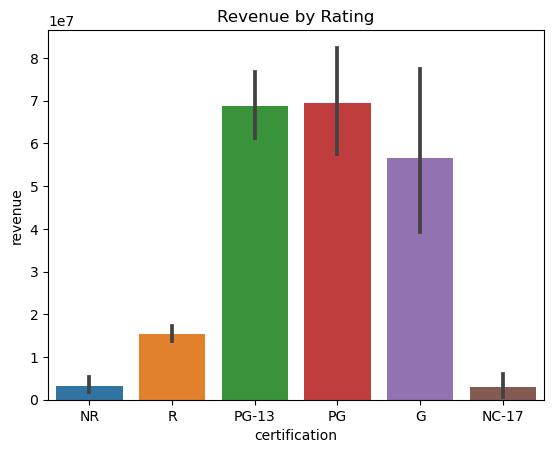

In [21]:
sns.barplot(data=tmdb_df, x='certification',y='revenue').set(title = 'Revenue by Rating');

- PG-13, PG, and G movies earned the highest ratings, while NR and NC-17 movies earned the lowest ratings. 

## Hypothesis Test 2- Do movies perform better in certain months?

- Null Hypothesis: There is no significant difference between the month that movies come out in and the revenues that they generate. 
- Alternative Hypothesis: There is a significant difference between the month that movies come out in and the revenues that they generate. 
- We will use an ANOVA test for this.

In [22]:
tmdb_df['month'].value_counts()

1.0     752
9.0     730
10.0    694
4.0     488
3.0     482
6.0     457
8.0     445
11.0    434
5.0     408
2.0     388
12.0    384
7.0     339
Name: month, dtype: int64

In [23]:
months = {}
## Loop through all unique categories
for i in tmdb_df['month'].unique():
    ## Get series for group and rename
    data = tmdb_df.loc[tmdb_df['month']==i,'revenue'].copy()
    
    # save into the dictionary
    months[i] = data
months.keys()

dict_keys([1.0, 9.0, 11.0, 10.0, 7.0, 6.0, 4.0, 5.0, 8.0, 12.0, 2.0, 3.0])

In [24]:
# check for outliers
zscores_f = stats.zscore(data)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

8

In [25]:
# remove outliers
data = data[(np.abs(stats.zscore(data)) < 3)]

- Because n > 15 for all categories, we can ignore the normality test

In [26]:
# checking variance
stats.levene(*months.values())

LeveneResult(statistic=19.84060750648187, pvalue=7.13087681476262e-40)

- Because the pvalue is less than 0.05, we reject the null hypothesis, meaning the groups do not have equal variance

In [27]:
# perform correct hypothesis test
result = stats.kruskal( *months.values())
result

KruskalResult(statistic=205.0462185736934, pvalue=6.666758318133103e-38)

- Because the pvalue is less than 0.05, we reject the null hypothesis. This tells us that there is a significant difference between the revenues of movies during different months.

In [28]:
## save the values
values = tmdb_df['revenue']
labels = tmdb_df['month']

In [29]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,21203676.9278,0.0435,288430.9131,42118922.9425,True
1.0,3.0,20819705.2134,0.0248,1296079.4123,40343331.0146,True
1.0,4.0,12953653.3875,0.5663,-6496693.2699,32404000.045,False
1.0,5.0,50463382.0853,0.0,29889069.7968,71037694.3738,True
1.0,6.0,45053354.8673,0.0,25206967.4516,64899742.283,True
1.0,7.0,52520262.6592,0.0,30630606.4558,74409918.8626,True
1.0,8.0,17484206.1322,0.1572,-2527931.643,37496343.9075,False
1.0,9.0,7647996.3618,0.956,-9737579.7334,25033572.457,False
1.0,10.0,10168943.4015,0.7673,-7443954.8291,27781841.632,False
1.0,11.0,31199497.2394,0.0,11028661.4317,51370333.0471,True


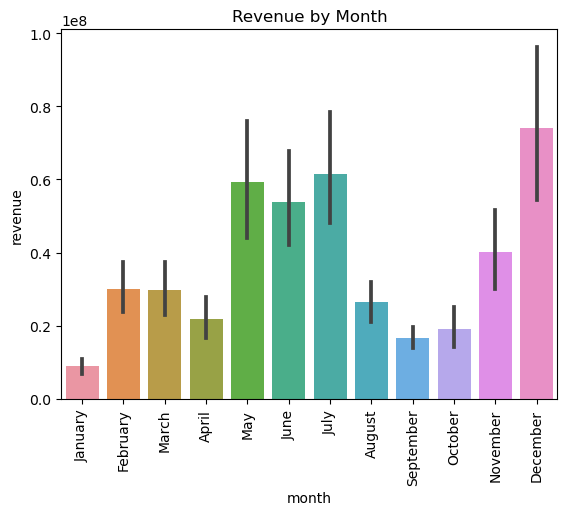

In [30]:
ax = sns.barplot(data=tmdb_df, x='month',y='revenue')
ax.set(title = 'Revenue by Month')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December'], rotation = 90);

- December is the highest grossing month, while January is the lowest grossing month.

## Hypothesis Test 3- Do movies over 2 hours long earn more revenue than movies under 2 hours long?

- Null Hypothesis: There is no significant difference in revenue between movies that are over 2 and under 2 hours long.
- Alternative Hypothesis: There is a significant difference in revenue between movies that are over 2 and under 2 hours long.
- We will use an independent t-test here. 

In [31]:
tmdb_df['runtime'].value_counts()

90.0     395
95.0     238
93.0     199
96.0     195
97.0     186
        ... 
191.0      1
213.0      1
45.0       1
40.0       1
366.0      1
Name: runtime, Length: 147, dtype: int64

In [32]:
over2 = tmdb_df.loc[tmdb_df['runtime']> 120,"revenue"]
under2 = tmdb_df.loc[tmdb_df['runtime']< 120,"revenue"]

In [33]:
# check for outliers
zscores_f = stats.zscore(over2)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

15

In [34]:
# remove outliers
data = data[(np.abs(stats.zscore(data)) < 3)]

In [35]:
# check for outliers
zscores_f = stats.zscore(under2)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

117

In [36]:
# remove outliers
data = data[(np.abs(stats.zscore(data)) < 3)]

- Because n > 15 for both categories, we can ignore the normality test

In [37]:
# check variance
result = stats.levene(over2, under2)
result

LeveneResult(statistic=498.9764933310406, pvalue=3.398849210169062e-106)

- The pvalue shows that there is not equal variance.

In [38]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(over2, under2, equal_var = False)
result

Ttest_indResult(statistic=10.28662329943358, pvalue=6.379326060913793e-23)

- Because the pvalue is under 0.05, we reject the null hypothesis. This shows that there is a significant difference between the revenue of movies that are under and over 2 hours long. 

In [39]:
tmdb_df['over_2hrs'] = tmdb_df['runtime'] > 120
tmdb_df

,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,revenue,runtime,title,vote_average,...,Genre_Fantasy,Genre_History,Genre_Documentary,Genre_War,Genre_Western,Genre_TV Movie,year,month,day,over_2hrs
2,tt0197633,0.0,False,0.0,1.826,[],0.0,75.0,Live Freaky! Die Freaky!,3.800,...,False,False,False,False,False,False,2006.0,1.0,31.0,False
4,tt0206634,0.0,False,76000000.0,36.219,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",70595464.0,109.0,Children of Men,7.605,...,False,False,False,False,False,False,2006.0,9.0,22.0,False
5,tt0244521,0.0,False,0.0,6.350,"[{'id': 110622, 'logo_path': None, 'name': 'FW...",0.0,98.0,Funny Money,5.300,...,False,False,False,False,False,False,2006.0,1.0,1.0,False
6,tt0259822,0.0,False,5000000.0,9.041,"[{'id': 3490, 'logo_path': None, 'name': 'Medi...",0.0,101.0,.45,5.211,...,False,False,False,False,False,False,2006.0,11.0,30.0,False
7,tt0266732,0.0,False,0.0,2.017,"[{'id': 76808, 'logo_path': None, 'name': 'Box...",0.0,96.0,Love Is the Drug,6.800,...,False,False,False,False,False,False,2006.0,10.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19252,tt1006926,0.0,True,0.0,28.608,"[{'id': 5542, 'logo_path': '/ayE4LIqoAWotavo7x...",14817006.0,95.0,One Piece: Dead End Adventure,7.000,...,False,False,False,False,False,False,2003.0,3.0,1.0,False
19264,tt1133935,0.0,True,0.0,13.005,"[{'id': 7164, 'logo_path': '/vHsaqTkQ2ZTbdqrCA...",0.0,110.0,Detective Conan: Crossroad in the Ancient Capital,7.000,...,False,False,False,False,False,False,2003.0,4.0,19.0,False
19274,tt1340586,0.0,False,15000.0,0.841,[],0.0,97.0,Jack and Jill,0.000,...,False,False,False,False,False,False,2003.0,6.0,6.0,False
19286,tt2096461,0.0,False,0.0,1.154,"[{'id': 11002, 'logo_path': None, 'name': 'Sto...",0.0,142.0,Freak Out,6.000,...,False,False,False,False,False,False,2003.0,8.0,1.0,True


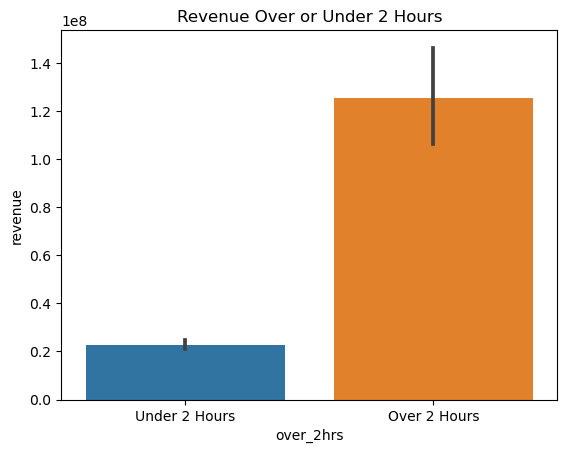

In [40]:
ax = sns.barplot(data = tmdb_df, x = 'over_2hrs', y = 'revenue')
ax.set(title = 'Revenue Over or Under 2 Hours');
ax.set_xticklabels(['Under 2 Hours', 'Over 2 Hours']);

- Movies over 2 hours long have a much greater revenue than movies under 2 hours long. 